In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/bill_authentication/bill_authentication.csv')

In [3]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop(columns=['Class'])
X

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [6]:
y = df.Class
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [8]:
len(X_train)

1097

In [9]:
len(X_test)

275

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier = DecisionTreeClassifier()

In [11]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [14]:
print("classification report ",classification_report(y_test,y_pred))

classification report                precision    recall  f1-score   support

           0       0.99      1.00      0.99       144
           1       1.00      0.98      0.99       131

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [15]:
print("accuracy score ",accuracy_score(y_test,y_pred))

accuracy score  0.9927272727272727


In [16]:
print("confusion matrix ",confusion_matrix(y_test,y_pred))

confusion matrix  [[144   0]
 [  2 129]]


In [17]:
# Single prediction
sample = [[-1.38870,-4.87730,6.4774,0.34179]]
prediction = classifier.predict(sample)

# Output the result
print("Predicted Class:", "Genuine" if prediction[0] == 1 else "Fake")

Predicted Class: Genuine


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


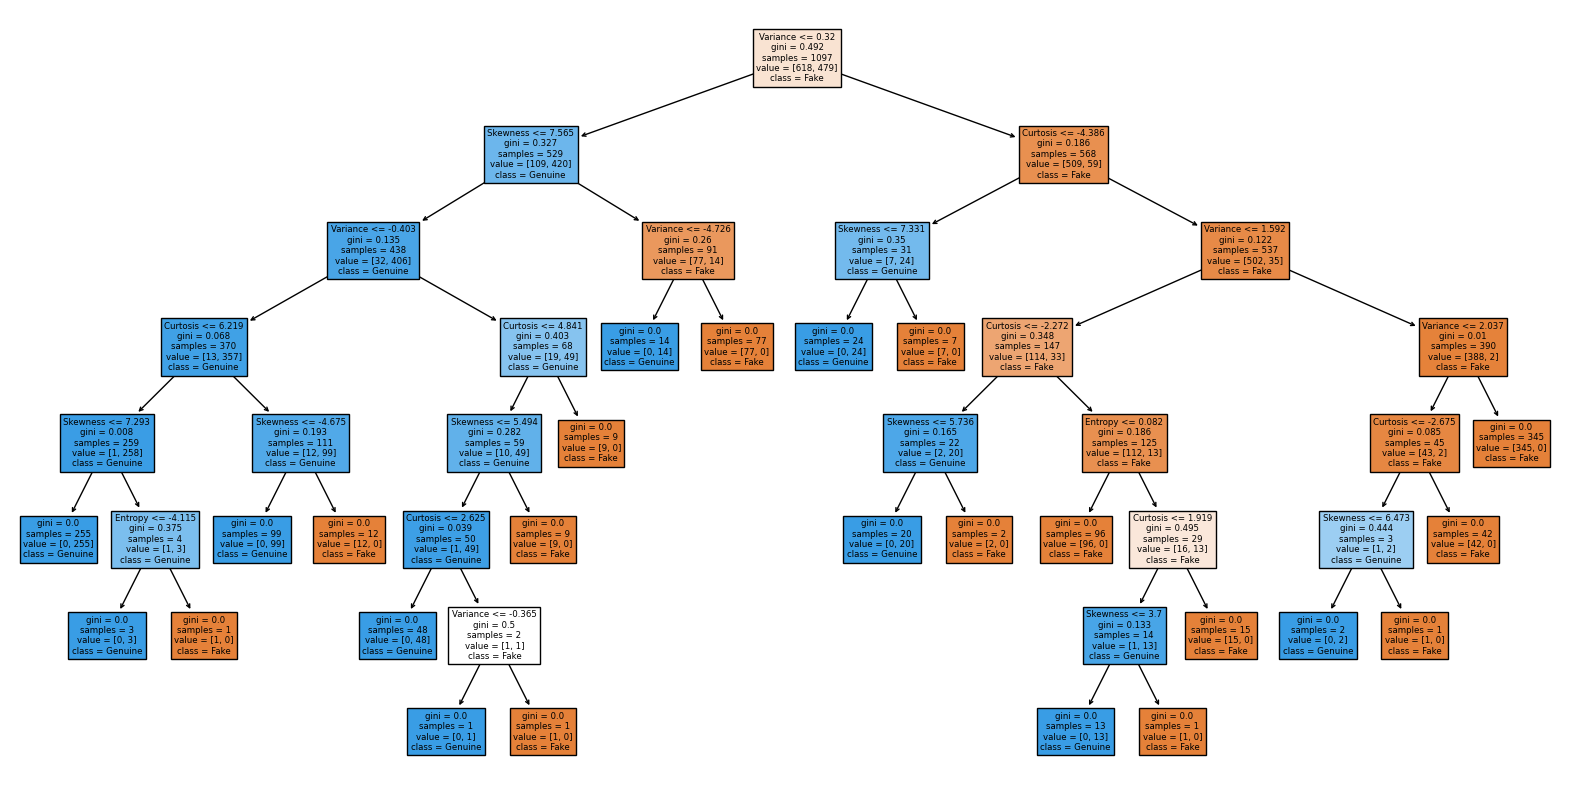

In [18]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(classifier, feature_names=X.columns, class_names=['Fake', 'Genuine'], filled=True)
plt.show()